In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
import seaborn as sns

In [2]:
StudentsPerformance = pd.read_csv('/Users/alex/Лекции/Статистика/StudentsPerformance.csv')

In [4]:
StudentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
StudentsPerformance['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
#я считаю, что для анализа данных между 'high school' и 'some high school' нет разницы, поэтому логично прировнять их к одному значению.  
StudentsPerformance = StudentsPerformance.replace('some high school', 'high school')

In [12]:
dynamics = StudentsPerformance[['math score', 'writing score', 'reading score'] + ['parental level of education']] \
    .groupby('parental level of education').mean()

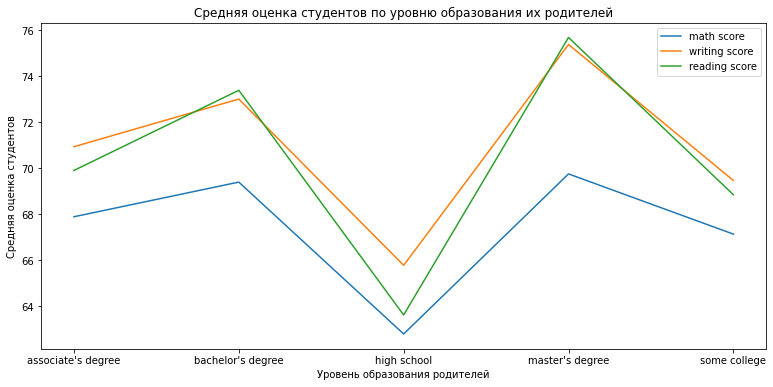

In [30]:
for region in [x for x in StudentsPerformance.columns if 'score' in x]:
    plt.plot(dynamics.index, dynamics[region])
    plt.title('Средняя оценка студентов по уровню образования их родителей')
    plt.xlabel('Уровень образования родителей')
    plt.ylabel('Средняя оценка студентов') 
    plt.legend(dynamics)

# Вывод: Из данного графика видим, что есть прямая взаимосвязь между уровнем образования родителей и успеваемостью студента, так как в среднем студенты, родители которых получили высшее образование, учатся лучше студентов, у которых родители закончили только школу. Так же видим, что в целом у студентов самые плохие оценки по математике.  

In [31]:
StudentsPerformance['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [3]:
# посчитаем общий балл студента 
StudentsPerformance['Total_score'] = StudentsPerformance['math score'] + StudentsPerformance['writing score'] + StudentsPerformance['reading score']

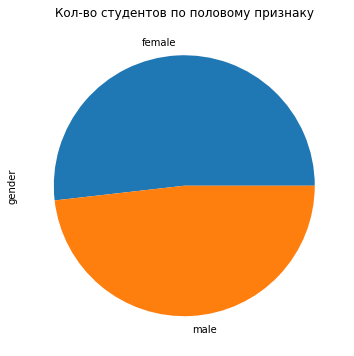

In [37]:
pie_data = StudentsPerformance.gender.value_counts().sort_values(ascending = False).head(10)
ax = pie_data.plot(kind='pie',
                   title='Кол-во студентов по половому признаку')

# Вывод: Видим, что среди студентов, девушек чуть больше, чем мужчин. 

In [4]:
#посчитаем средний общий бал студента по 10 балльной шкале
StudentsPerformance['average_score'] = StudentsPerformance['Total_score'] / 3 //10

In [19]:
StudentsPerformance.rename(columns={ StudentsPerformance.columns[1]: "race_ethnicity" }, inplace = True)

<AxesSubplot:title={'center':'USer Score distribution'}, ylabel='Frequency'>

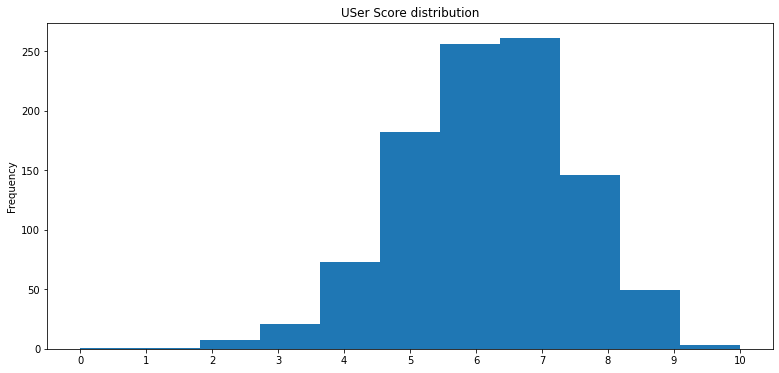

In [7]:
StudentsPerformance.average_score.plot(kind='hist', 
                   bins=11,
                   title='score',
                   xlabel='USer score',
                   ylabel='Games',
                   xticks=range(0, 11))

# Вывод: Видим, что большинство студентов учатся на уровне между 6 - 7 баллами

<AxesSubplot:xlabel='race_ethnicity', ylabel='Total_score'>

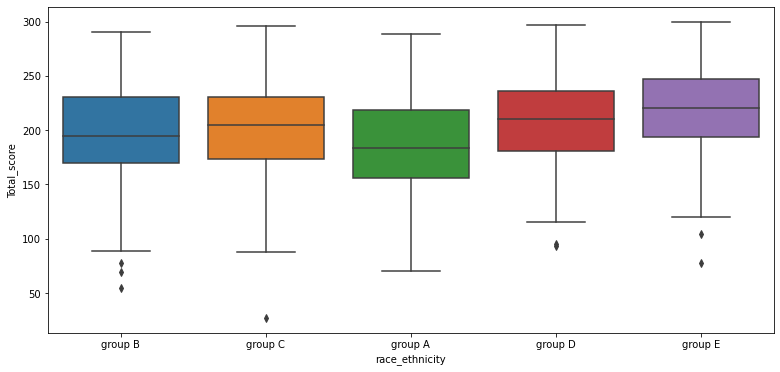

In [24]:
group = StudentsPerformance.race_ethnicity.value_counts().sort_values(ascending = False).head(10).index.values
group
sns.boxplot(x="race_ethnicity", y="Total_score", 
            data=StudentsPerformance[StudentsPerformance.race_ethnicity.isin(group)])

# Вывод: Видим, что лучше всего учатся студенты из группы «Е», студенты из группы «А» хуже всех по успеваемости, так же можно заметить, что больше всего выбросов(отстающих студентов) в группе «В».

In [29]:
st_preparation = StudentsPerformance[['test preparation course', 'Total_score']].groupby('test preparation course').mean()

<AxesSubplot:title={'center':'Platforms by Global Sales'}, xlabel='test preparation course', ylabel='Total_score'>

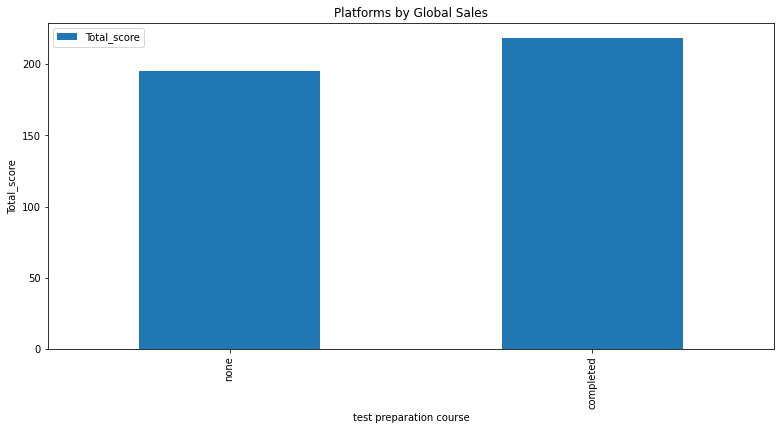

In [31]:
st_preparation.loc[['none', 'completed']].plot(kind='bar', 
                                               title='Platforms by Global Sales',
                                               xlabel='test preparation course',
                                               ylabel='Total_score')

# Вывод: Видим, что студенты, которые прошли подготовку к тестам, учатся лучше, чем остальные студенты.